# Code to create the texture colormap.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from matplotlib.colors import ListedColormap

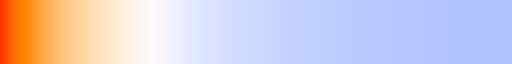

In [3]:
bb_cmap = plt.imread('bb.png')
new_cmap = ListedColormap(bb_cmap[0],name='blackbody')
new_cmap

In [4]:
from matplotlib.colors import LinearSegmentedColormap
minor = [(0.0,  0.0, 0.0),
        (0.7, 0.0, 0.0),
        (1.0,  .5, 0.0)]
major = [(0.0,  0.0, 0.0),
        (0.1, 0.3, 0.3),
        (1.0,  1.0, 0.0)]

cmaps = []
colors = ['red','green','blue']
for color in colors:
    cdict = {color:major,**dict([(subcolor,minor) for subcolor in colors if subcolor !=color])}
    cmaps += [LinearSegmentedColormap('Blk'+color.title(),cdict)]

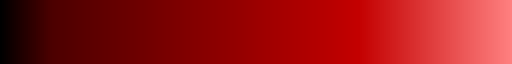

In [5]:
cmaps[0]

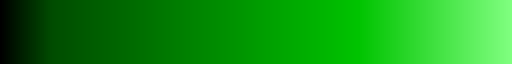

In [6]:
cmaps[1]

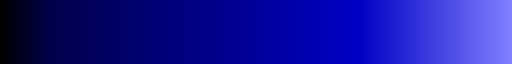

In [7]:
cmaps[2]

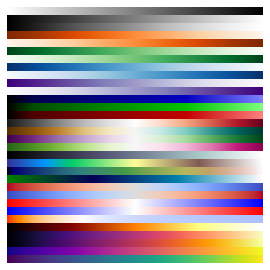

In [8]:
def plot_cmap(colormaps, pts, dpi=72,manual_cmaps=None):
    ny, nx = pts.shape
    ny *= len(colormaps)

    ## create a square image that has a precise number of pixels
    ##  a row for each colormap
    f, ax = plt.subplots(len(colormaps),1, figsize=(nx/dpi, ny/dpi), dpi=dpi)
    plt.subplots_adjust(wspace=0, hspace=0, bottom=0, top=1, left=0, right=1)

    ## plot a color gradient in each axis
    for i,c in enumerate(colormaps):
        ax[i].imshow(pts, aspect='equal', cmap=c)
        ax[i].axis('off')
        
    if manual_cmaps is not None:
        for i,cmap in enumerate(manual_cmaps):
            print('replacing',colormaps[i])
            ax[i].imshow(cmap,aspect='equal')

gradient = np.linspace(0, 1, 256)
colormapsList= [
        'viridis',
        'plasma',
        'inferno',
        'magma',
        'afmhot',
        new_cmap,
        'bwr',
        'bwr_r',
        'coolwarm',
        'coolwarm_r',
        'ocean',
        'gist_earth',
        'terrain',
        'bone',
        'PiYG_r',
        'PRGn',
        'BrBG',
        'RdGy_r',
        cmaps[0],
        cmaps[1],
        cmaps[2],
        'Purples',
        'Purples_r',
        'Blues',
        'Blues_r',
        'Greens',
        'Greens_r',
        'Oranges',
        'Oranges_r',
        'Greys_r',
        'binary_r',
        'binary',
        ]


## thickness of each row in pixels
ny = 8

## create a grid of gradient points
pts = np.zeros((ny,gradient.size))
pts[:,] = gradient

## make image
plot_cmap(colormapsList[::-1], pts) #reversed order for consistency with Mahlet's version


plt.savefig("colormap.png", bbox_inches='tight',pad_inches=0)
plt.show()

colormapsList = [name if type(name) == str else name.name for name in colormapsList ]

## write colormap names out
with open("colormap_names.json",'w') as handle:
    handle.write('{"names":%s'%str(colormapsList).replace("'",'"')+'}')